In [2]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching spring_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s spring_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


In [142]:
# analytical solutions 

Output saved by overwring previous file at animations/spring/spring.mp4.


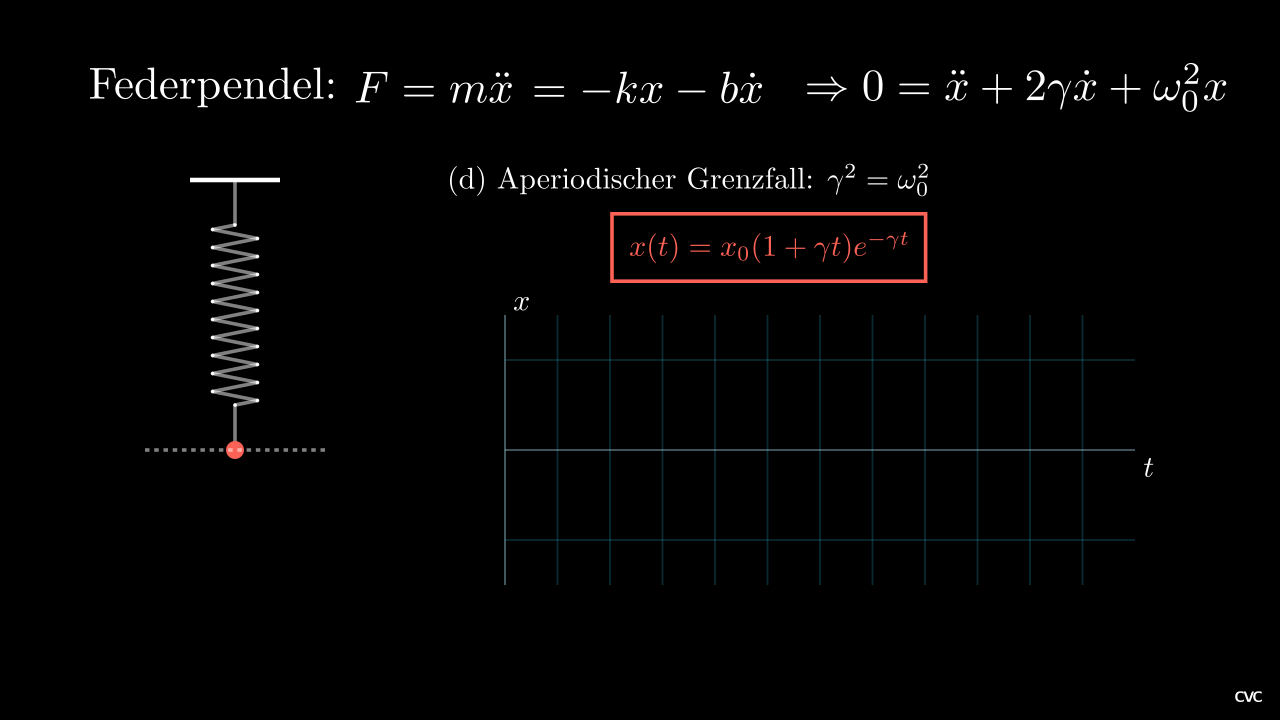

In [141]:
%%capture_video --path "animations/spring/spring.mp4"
%%manim -qm --fps 60 $video_scene


# spring model
def Spring(start = UP, end = DOWN, tip_buff = 0.25, nodes = 20, k = 0.5, color = WHITE, stroke_width = 4):
    spring_group = VGroup()
    start[2], end[2] = 0, 0

    # extended parameters
    direction = (end - start) / npl.norm(end - start)
    anti_direction = np.array([direction[1], -direction[0], direction[2]])
    eff_start = start + tip_buff*direction
    eff_end = end - tip_buff*direction
    eff_length = npl.norm(eff_end - eff_start)
    node_length = eff_length / nodes
    node_deviance = k

    # add line with given start 'l_start' and endpoint 'l_end'
    def spring_add_line(l_start, l_end):
        spring_group.add(Line(l_start, l_end, color = color, stroke_width = stroke_width, stroke_opacity = 0.5))
    
    # adding point with given 'pos'
    def spring_add_dot(d_pos):
        spring_group.add(Dot(d_pos, color = color, radius = 0.02))

    # objects
    spring_add_line(start, eff_start)               # start linie
    spring_add_line(eff_end, end)                   # end line
    spring_add_dot(eff_start)                       # start dot
    spring_add_dot(eff_end)                         # end dot
    spring_add_line(eff_start, eff_start + direction * node_length / 2 + anti_direction * node_deviance / 2)                                # first line
    spring_add_dot(eff_start + direction * node_length / 2 + anti_direction * node_deviance / 2)                                            # first dot
    spring_add_line(eff_start + direction * (nodes - 1/2) * node_length + (-1)**(nodes+1) * anti_direction * node_deviance / 2, eff_end)    # last line
    for i in range(1, nodes):
        spring_add_line(eff_start + direction * (i - 1/2) * node_length + (-1)**(i+1) * anti_direction * node_deviance / 2, eff_start + direction * (i + 1/2) * node_length + (-1)**(i) * anti_direction * node_deviance / 2)
        spring_add_dot(eff_start + direction * (i + 1/2) * node_length + (-1)**(i) * anti_direction * node_deviance / 2)
    return spring_group


class spring_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Header
        text_head = Tex(r"Federpendel:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT + 0.25 * DOWN)
        text_head_newton = Tex(r"$F=m\ddot{x}$", font_size = 48).next_to(text_head, RIGHT)
        text_head_eq1 = Tex(r"$=-kx$", font_size = 48).next_to(text_head_newton, RIGHT)
        text_head_eq2 = Tex(r"$=-kx-b\dot{x}$", font_size = 48).next_to(text_head_newton, RIGHT)
        self.add(text_head, text_head_newton, text_head_eq2)

        text_head_x = Tex(r"$\Rightarrow x_0=-\frac{F_0}{k}$", font_size = 48).next_to(text_head_eq1, 5*RIGHT)
        text_head_deq1 = Tex(r"$\Rightarrow 0=\ddot{x}+\omega_0^2 x$", font_size = 48).next_to(text_head_eq1, 5*RIGHT)
        text_head_deq2 = Tex(r"$\Rightarrow 0=\ddot{x}+2\gamma\dot{x}+\omega_0^2 x$", font_size = 48).next_to(text_head_eq2, 2*RIGHT)
        self.add(text_head_deq2)


        # Description
        text_case1 = Tex(r'(a) Ungedämpfte Lösung:', font_size = 32).align_on_border(LEFT, buff = 5).shift(2*UP)
        text_sol1 = Tex(r'$x(t)=x_0\cos{(\omega_0t)}$', font_size = 32, color = RED).align_on_border(LEFT, buff = 7).shift(1.25*UP)
        sol1_box = SurroundingRectangle(text_sol1, color = RED, buff = 0.2)

        # \frac{x_0}{2}\left[\left(1+\frac{\gamma}{\sqrt{\gamma^2+\omega_0^2}}\right)

        text_case2 = Tex(r'(b) Kriechfall: $\gamma^2>\omega_0^2$', font_size = 32).align_on_border(LEFT, buff = 5).shift(2*UP)
        text_sol2 = Tex(r'$x(t)=Ae^{\left(-\gamma+\sqrt{\gamma^2+\omega_0^2}\right)t}+Be^{\left(-\gamma-\sqrt{\gamma^2+\omega_0^2}\right)t}$', font_size = 32, color = RED).align_on_border(LEFT, buff = 6.5).shift(1.25*UP)
        sol2_box = SurroundingRectangle(text_sol2, color = RED, buff = 0.15)

        text_case3 = Tex(r'(c) Schwingfall: $\gamma^2<\omega_0^2$', font_size = 32).align_on_border(LEFT, buff = 5).shift(2*UP)
        text_sol3 = Tex(r'$x(t)=x_0\cos{(\omega_0t)}e^{-\gamma t}$', font_size = 32, color = RED).align_on_border(LEFT, buff = 7).shift(1.25*UP)
        sol3_box = SurroundingRectangle(text_sol3, color = RED, buff = 0.2)

        text_case4 = Tex(r'(d) Aperiodischer Grenzfall: $\gamma^2=\omega_0^2$', font_size = 32).align_on_border(LEFT, buff = 5).shift(2*UP)
        text_sol4 = Tex(r'$x(t)=x_0(1+\gamma t)e^{-\gamma t}$', font_size = 32, color = RED).align_on_border(LEFT, buff = 7).shift(1.25*UP)
        sol4_box = SurroundingRectangle(text_sol4, color = RED, buff = 0.2)
        
        
        #self.add(text_case1, text_sol1, sol1_box)
        # self.add(text_case2, text_sol2, sol2_box)
        # self.add(text_case3, text_sol3, sol3_box)
        self.add(text_case4, text_sol4, sol4_box)


        anchor_pos = np.array([-4.5, 2, 0])
        dot_pos = np.array([-4.5, -1, 0])

        spring = Spring(start = anchor_pos, end = dot_pos, k = 0.5, tip_buff = 0.5, nodes = 20)
        spring_anchor = Line(anchor_pos - 0.5*RIGHT, anchor_pos + 0.5*RIGHT, color = WHITE, stroke_width = 5)
        spring_mass = Dot(dot_pos, color = RED, radius = 0.1)
        spring_base_length = DashedLine(dot_pos - 1*RIGHT, dot_pos + 1*RIGHT, color = WHITE, stroke_width = 4, stroke_opacity = 0.5)
        self.add(spring, spring_anchor, spring_mass, spring_base_length)



        # Coordinate System
        origin = [2, -1, 0]

        x_range = [0, 12, 1]
        y_range = [-1.5, 1.5, 1]

        x_length = 7
        y_length = 3

        npla = ComplexPlane(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin)#.add_coordinates()
        ax = Axes(
            x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length, 
            axis_config = {"stroke_width": 1, "stroke_opacity": 0.75, "tip_length": 0.1, "tip_width": 0.2}, tips = True).move_to(origin)#.add_coordinates(x_dict, y_dict)
        npla_xlabel = npla.get_x_axis_label(Tex(r"$t$", font_size = 32)).shift(0.4*DOWN)
        npla_ylabel = npla.get_y_axis_label(Tex(r"$x$", font_size = 32))
        npla_group = VGroup(npla, npla_xlabel, npla_ylabel)
        self.add(npla_group)


        # analytical solutions


        # spring updater
        def spring_direct_updater(spring):
            target_pos = np.array([dot_pos[0], y_tracker.get_value(), 0])
            spring_mass.become(Dot(target_pos, color = RED, radius = 0.1))
            spring.become(Spring(start = anchor_pos, end = target_pos, k = 0.5, tip_buff = 0.5, nodes = 20))

        def spring_osz_updater(spring):
            target_pos = np.array([dot_pos[0], -np.cos(y_tracker.get_value()) - 1, 0])
            spring_mass.become(Dot(target_pos, color = RED, radius = 0.1))
            spring.become(Spring(start = anchor_pos, end = target_pos, k = 0.5, tip_buff = 0.5, nodes = 20))


        # y_tracker = ValueTracker(-1)

        # spring.add_updater(spring_direct_updater)
        # self.wait(0.5)
        # self.play(y_tracker.animate.set_value(-2), rate_func = smooth, run_time = 2)
        # self.wait(3)
        # spring.remove_updater(spring_direct_updater)
        # y_tracker.set_value(0)
        # spring.add_updater(spring_osz_updater)
        # self.play(y_tracker.animate.set_value(8*PI), rate_func = linear, run_time = 8)
        # self.wait(5)